<a href="https://colab.research.google.com/github/jgp20/HCSPD2024/blob/main/Semana_6_Uso_Julia_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e
#-------#2min la JULIA_VERSION="1.10.2", dar F5--------------------------------------------#
JULIA_VERSION="1.10.2" # any version ≥ 0.7.0 iba 8 en lugar de 10
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#
if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz
  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done
  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia
  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.10.2 on the current Colab Runtime...
2024-04-23 19:49:17 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz [169654402/169654402] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
Luego de hacer F5: La función `versioninfo()` debería imprimir la versión de Julia y alguna información del sistema:

In [ ]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


Acá empieza el uso de JULIA en Colab.

# Uso de JULIA en Colab.
A patir de acá, se puede emplear toda la funcionalidad de JULIA.
La documentación está en sitios como https://docs.sciml.ai/Overview/stable/

y

http://web.mit.edu/julia_v0.6.2/julia/share/doc/julia/html/en/index.html

Para Visual Studio: https://www.julia-vscode.org/docs/dev/userguide/keyboard/


El detalle del toolbox de Control está en
https://juliacontrol.github.io/ControlSystems.jl/stable/
#Instrucciones recomendadas
Para la simulación de procesos dinámicos, es muy útil emplear las instrucciones básicas para control y cálculo numérico.

In [ ]:
using Pkg;
Pkg.add("Plots") #5min

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed GR_jll ─────────────────────── v0.73.3+0
   Installed JpegTurbo_jll ──────────────── v3.0.2+0
   Installed Libmount_jll ───────────────── v2.39.3+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Unitful ────────────────────── v1.19.0
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed ConcurrentUtilities ────────── v2.4.1
   Installed Measures ───────────────────── v0.3.2
   Installed Contour ────────────────────── v0.6.3
   Installed Plot

In [ ]:
using Plots

Cargar de librearías para interpretar Latex en los plot.

In [ ]:
#import Pkg;
# using Pkg;
Pkg.add("LaTeXStrings")
using LaTeXStrings

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


#Caso del avión

In [ ]:
function modavion(t_etapa, xant, accion)
  a=0.01; b=2; c=100;
  omega=0.2;
  At=1e-3;
  u=accion;
  #%xant=[alfa,fi,fi_p,h]
  alfa=xant[1];
  fi=xant[2];
  fi_p=xant[3];
  h=xant[4];
  x=xant;
  for ii = 1:t_etapa/At
    #%xp=A*x+B*u;
    alfa_p=a*(fi-alfa);
    fi_pp=(-omega^2)*(fi-alfa-b*u);
    h_p=c*alfa;
    xp=[alfa_p,fi_p,fi_pp,h_p];
    x=x+xp*At;
    fi_p=xp[2];
    alfa=x[1];
    fi=x[2];
    fi_p=x[3];
    h=x[4];
  end
  X=x;
end
#=
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x];%
=#

modavion (generic function with 1 method)

In [ ]:
X=-[0, 0,0,0];t_etapa=10e-3;
tF=5.;
Ts=t_etapa;
N_val = tF/Ts;
#=%A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
%B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
%C1=Kd/Ts;
%e=zeros(round(tF/t_etapa),1); =#
u=0;
x2 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
x4 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
acc= Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
ii=0;
for t=0:t_etapa:tF-t_etapa
  ii=ii+1;
  x2[ii]=X[2];#%Ángulo fi
  x4[ii]=X[4];#%tensión en el capacitor
  X=modavion(t_etapa, X, u);
  acc[ii]=u;
  u=1;
end
t=0:t_etapa:tF-t_etapa;

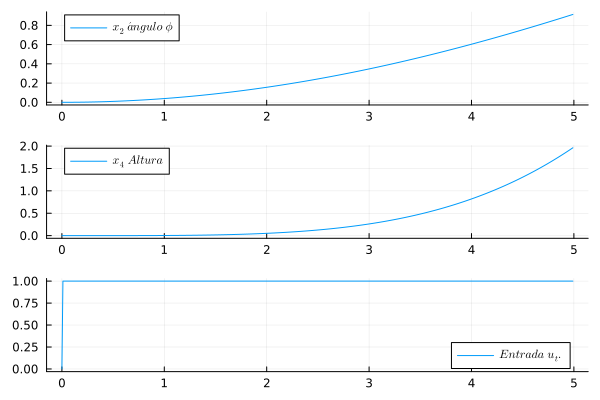

In [ ]:
P1=plot(t, x2, label=L"x_2 \ \'angulo \  \phi", lw=1)
P2=plot(t, x4, label=L"x_4 \ Altura", lw=1)
P3=plot(t, acc, label=L"Entrada \ u_t.", lw=1)
plot(P1, P2, P3, layout=(3,1) )
#plot(P1, P2, P3, layout=grid(3, 1, heights=[0.8 ,0.2, 1.1]))

## Cálculo simbólico
En Julia es posible realizar cálculo simbólico, pero **no es** posible obtener soluciones analíticas de ecuaciones diferenciales.
https://symbolics.juliasymbolics.org/stable/

In [ ]:
Pkg.add("Symbolics") #3min en Colab, 2min en visualstudio

   Resolving package versions...
   Installed Calculus ──────────────────── v0.5.1
   Installed TimerOutputs ──────────────── v0.5.23
   Installed StaticArrays ──────────────── v1.9.3
   Installed PDMats ────────────────────── v0.11.31
   Installed StatsFuns ─────────────────── v1.3.1
   Installed HypergeometricFunctions ───── v0.3.23
   Installed MutableArithmetics ────────── v1.4.3
   Installed Accessors ─────────────────── v0.1.36
   Installed LabelledArrays ────────────── v1.15.1
   Installed DomainSets ────────────────── v0.7.12
   Installed Bijections ────────────────── v0.1.6
   Installed EnumX ─────────────────────── v1.0.4
   Installed RecursiveArrayTools ───────── v3.13.0
   Installed FunctionWrappers ──────────── v1.1.3
   Installed MultivariatePolynomials ───── v0.5.4
   Installed SpecialFunctions ──────────── v2.3.1
   Installed CompositeTypes ────────────── v0.1.4
   Installed SciMLBase ─────────────────── v2.34.0
   Installed StaticArraysCore ──────────── v1.4.2
   Insta

In [ ]:
using Symbolics

In [ ]:
@variables t x y z
ex0 = -4//3 * x + y ~ 2
Symbolics.solve_for(ex0, x)

(3//4)*(-2 + y)

$\begin{equation}
\frac{3}{4} \left( -2 + y \right)
\end{equation}$

In [ ]:
Symbolics.solve_for(ex0, y)

(2//1) + (4//3)*x

% \begin{equation}
2 + \frac{4}{3} x
\end{equation}%

In [ ]:
ex1 = 3 * x + 2 * y - z ~ 1
ex2 = 2 * x - 2 * y + 4 * z ~ -2
ex3 = -x + 1//2 * y - z ~ 0
Symbolics.solve_for([ex1, ex2, ex3], [x, y, z])

3-element Vector{Float64}:
  0.9999999999999994
 -1.9999999999999984
 -1.9999999999999984

### Ejemplo de empleo del principio de superposición en un motor CC
Se tiene un sistema dinámico con dos entradas, con la salida que es la velocidad angular $\omega$ una es la tensión de armadura $V_A$ y la otra es el torque de carga $T_L$.
Para hallar la $\omega$ respuesta resultante de la suma de ambas respuestas independientes, se generan las funciones de transferencias independientes.


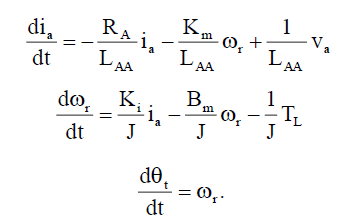

In [ ]:
# % Obtención de la función de transferencia del motor
# pasivando TL, se tiene la Wr/VA como
@variables Va, Ra, La, Ia, Ki, Wr, Jm, Km, Bm, TL, s
Eqn1 = s*Ia ~ -(Ra/La)*Ia-(Km/La)*Wr+(1/La)*Va
#res01=solve(Eqn1,Ia)
Ia_ = Symbolics.solve_for(Eqn1, Ia)
Eqn2 = s*Wr ~ (Ki/Jm)*Ia_-(Bm/Jm)*Wr
Wr_Va = Symbolics.solve_for(Eqn2, Wr)
print(`Wr_Va=`)
Wr_Va = Symbolics.simplify(Wr_Va)

`Wr_Va=`

(Ki*Va) / (Bm*Ra + Ki*Km + Bm*La*s + Jm*Ra*s + Jm*La*(s^2))

%`Wr_Va=`
 \begin{equation}
\frac{Ki Va}{Bm Ra + Ki Km + Bm La s + Jm Ra s + s^{2} Jm La}
\end{equation}%

In [ ]:
# % Obtención de la función de transferencia del motor
# pasivando Va, se tiene la Wr/TL como
Eqn3 = s*Ia ~ - (Ra/La)*Ia - (Km/La)*Wr
Ia_ = Symbolics.solve_for(Eqn3, Ia)
Eqn4 = s*Wr ~ (Ki/Jm)*Ia_ - (Bm/Jm)*Wr - (1/Jm)*TL
Wr_TL = Symbolics.solve_for(Eqn4, Wr)
print(`Wr_TL=`)
Wr_TL = Symbolics.simplify(Wr_TL)

`Wr_TL=`

((-Ra - La*s)*TL) / (Bm*Ra + Ki*Km + Bm*La*s + Jm*Ra*s + Jm*La*(s^2))

%`Wr_TL=`
 \begin{equation}
\frac{\left(  - Ra - La s \right) TL}{Bm Ra + Ki Km + Bm La s + Jm Ra s + s^{2} Jm La}
\end{equation}%

https://discourse.julialang.org/t/solve-differential-equation-algebraically/106352/3

In [ ]:
# julia> using SymPy
# julia> @syms x
# (x,)
# julia> y = sympy.Function("y")
# PyObject y
# julia> result = dsolve(sympy.Derivative(y(x), x) -  2*y(x)/x)
#            2
# y(x) = C₁⋅x
# https://discourse.julialang.org/t/solve-differential-equation-algebraically/106352
#

In [ ]:
Pkg.add("SymPy") #46 s en Colab

   Resolving package versions...
   Installed SymPy ───── v2.0.1
   Installed CommonEq ── v0.2.1
   Installed SymPyCore ─ v0.1.16
   Installed PyCall ──── v1.96.4
    Updating `~/.julia/environments/v1.10/Project.toml`
  [24249f21] + SymPy v2.0.1
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [3709ef60] + CommonEq v0.2.1
  [438e738f] + PyCall v1.96.4
  [24249f21] + SymPy v2.0.1
  [458b697b] + SymPyCore v0.1.16
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a3826b0ebf49ab4926e2b18842ad8b5c8f04/build.log`
Precompiling project...
  ✓ CommonEq
  ✓ SymPyCore
  ✓ SymPyCore → SymPyCoreSymbolicUtilsExt
  ✓ PyCall
  ✓ SymPy
  ✓ SciMLBase → SciMLBasePyCallExt
  ✓ Symbolics → SymbolicsSymPyExt
  7 dependencies successfully precompiled in 37 seconds. 256 already precompiled.


In [ ]:
using SymPy

In [ ]:
# julia> using SymPy
# julia> @syms x
# (x,)
# julia> y = sympy.Function("y")
# PyObject y
# julia> result = dsolve(sympy.Derivative(y(x), x) -  2*y(x)/x)
#            2
# y(x) = C₁⋅x
# https://discourse.julialang.org/t/solve-differential-equation-algebraically/106352
#

In [ ]:
@SymPy.syms x

(x,)

In [ ]:
y = sympy.Function("y")

y

In [ ]:
y_p =sympy.Derivative(y(x), x)

d    
──(y)
dx   

In [ ]:
 -2*y(x)

NotImplemented

#Sistemas realimentados

In [ ]:
#using Pkg; Pkg.add("ControlSystems") #Muy pesada, tarda mucho en cargarse
using Pkg; Pkg.add("ControlSystemsBase") #Mas liviana que la anterior 1 min aprox. 1 min.
using ControlSystemsBase

In [ ]:
using LinearAlgebra # For identity matrix I

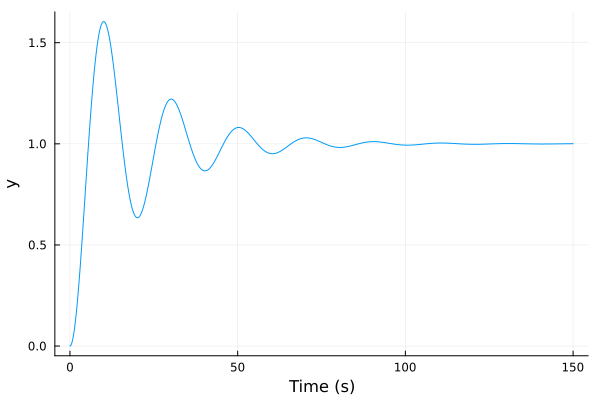

In [ ]:
t = 0:0.1:150 # original time axis
P=tf(.10, [1, .10, 0])
#T = P/(1+P)
T=feedback(P)
res2=step(T,t)
plot(res2)

In [ ]:
P = tf([1.0],[1,1])
T = P/(1+P)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
    1.0s + 1.0
-------------------
1.0s^2 + 3.0s + 2.0

Continuous-time transfer function model

##Sistemas realimentados con retardo

In [ ]:
using Pkg; Pkg.add("ControlSystems") #Muy pesada, tarda mucho en cargarse. 10min
using ControlSystems # Load full control systems to get simulation functionality

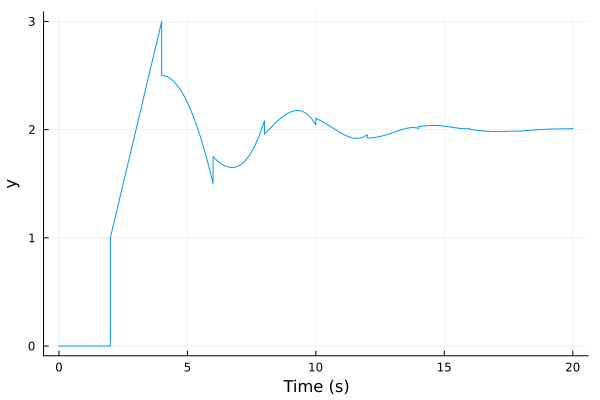

In [ ]:
P = tf([1, 1], [1, 0])*delay(2)
plot(step(feedback(P, 0.5), 0:0.001:20))

In [ ]:
feedback(P, 0.5)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 0.0
B = 
 0.0  1.0
C = 
  1.0
 -0.5
D = 
 0.0   1.0
 1.0  -0.5

Continuous-time state-space model

Delays: [2.0]

┌ Warning: Only showing smallest 5 out of 35 gain margins
└ @ ControlSystemsBase ~/.julia/packages/ControlSystemsBase/MHo5M/src/plotting.jl:719


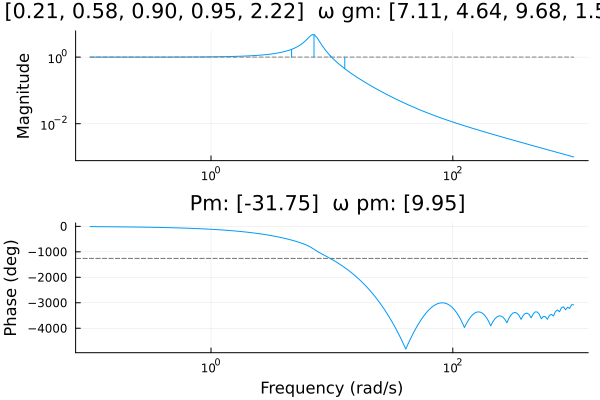

In [ ]:
TD=delay(2)               # Pure delay of .2s
P = tf([1, 50], [1, 1.5,50])*TD
marginplot(P)
#plot(step(feedback(P, 1), 0:0.001:40))

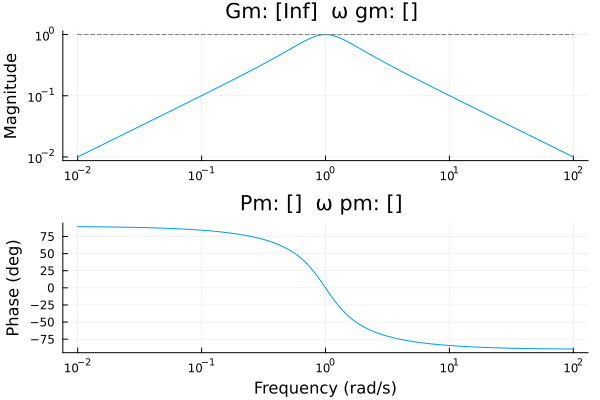

In [ ]:
P = tf([1,0],[1,1,1])
marginplot(P)
#T = P/(1+P)

Para saber las raíces, se puede usar roots(), de la libreria `PolynomialRoots`.

In [ ]:
using Pkg; Pkg.add("PolynomialRoots") #6seg https://juliapackages.com/p/polynomialroots
using PolynomialRoots

In [ ]:
 roots([1,3,3,1])

3-element Vector{ComplexF64}:
 -1.0 + 0.0im
 -1.0 - 0.0im
 -1.0 + 0.0im

In [ ]:
using Pkg; Pkg.add("Polynomials") #2seg
using Polynomials  #https://juliamath.github.io/Polynomials.jl/stable/

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f27b6e38] + Polynomials v3.2.9
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
H=fromroots([-1,-1,-1])

Polynomial(1 + 3*x + 3*x^2 + x^3)

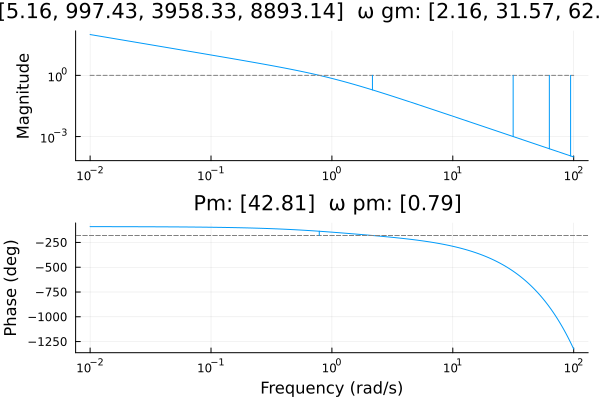

In [ ]:
TD=delay(.2)               # Pure delay of .2s
T1=tf(1.0, [1, 1,0])*TD # Input delay
#delay(1.2)*tf(1, [1, 1]) # Output delay
marginplot(T1)

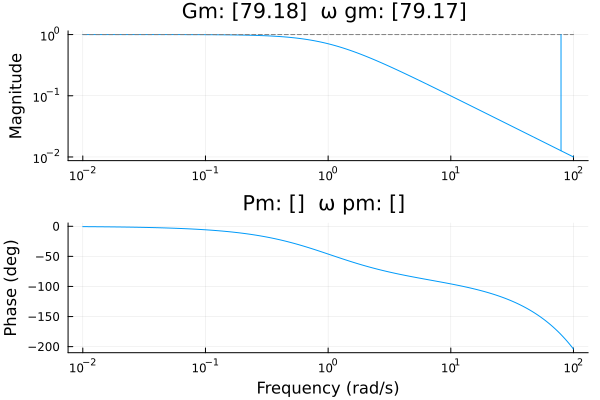

In [ ]:
marginplot(T1)

#Pruebas


In [ ]:
function fact(n::Int)
           n >= 0 || error("n debe ser positiva")
           n == 0 && return 1
           n * fact(n-1)
end
#fact (generic function with 1 method) respuesta indicando que tiene sólo un método adentro

fact (generic function with 1 method)

In [ ]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
y3 = @. sin(x)^2 - 1/2; #elemento a elemento de x

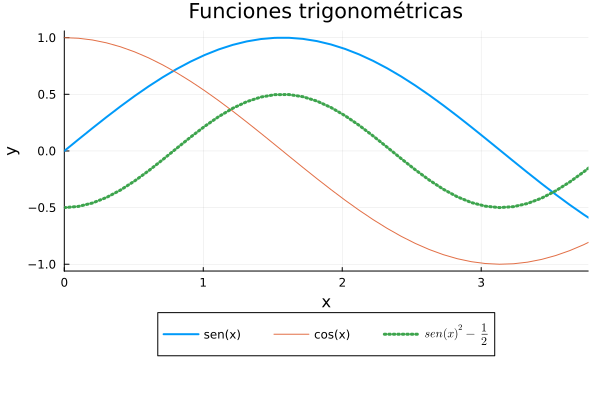

In [ ]:
plot(x, [y1 y2], label=["sen(x)" "cos(x)"], lw=[2 1])
plot!(x, y3, label=L"sen(x)^2 - \frac{1}{2}", lw=3, ls=:dot)
plot!(legend=:outerbottom, legendcolumns=3)
xlims!(0, 1.2pi)
title!("Funciones trigonométricas")
xlabel!("x")
ylabel!("y")
#=
plot!(legend=:outerbottom, legendcolumns=3)
xlims!(0, 2pi)
title!("Funciones trigonométricas")
xlabel!("x")
ylabel!("y")=#

In [ ]:
while true
    # do stuff
    cond() || break
end
num = 1
while num < 20
    sq_num = num*num
    if sq_num > 100
        break
    end
    println(sq_num)
    num += 1
end
array2 = [30, 40, 50, 60]
for (i, w) in zip(array, array2)
    println(i, w)
end
for i = 1:1000
  println(i)
  if i >= 5
    break
  end
end

In [ ]:
 X=-[10, 0.1,0.5,0.6];

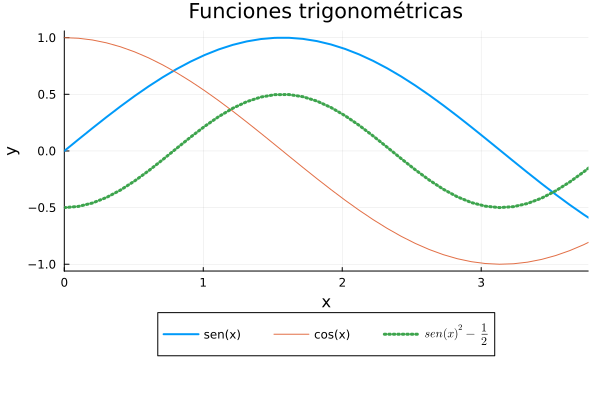

In [ ]:
plot(x, [y1 y2], label=["sen(x)" "cos(x)"], lw=[2 1])
plot!(x, y3, label=L"sen(x)^2 - \frac{1}{2}", lw=3, ls=:dot)
plot!(legend=:outerbottom, legendcolumns=3)
xlims!(0, 1.2pi)
title!("Funciones trigonométricas")
xlabel!("x")
ylabel!("y")

#Pruebas iniciales
Inicial, de prueba, estaban los comandos de abajo.

In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  547.662 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />